<a href="https://colab.research.google.com/github/yashguptaab99/Minimizing-Churn-Rate-Through-Analysis-of-Financial-Habits/blob/master/Minimizing_Churn_Rate_Through_Analysis_of_Financial_Habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# Importing Data

In [5]:
dataset = pd.read_csv('churn_data.csv')

In [6]:
dataset

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,24291,1,24.0,R,580.0,0,0,0,0,0,81,0,0,2,1,1,1,0,1,2,Weekly,0,0,0,0,Leo,0,0,32.0,1.07,1
26996,4116,1,26.0,na,NaN,0,0,2,0,0,1,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,1,Cancer,1,0,2.0,0.67,0
26997,23740,0,22.0,na,NaN,0,0,37,0,0,98,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Taurus,0,0,28.0,0.93,0
26998,47663,1,46.0,na,529.0,2,0,16,2,0,58,0,0,2,1,1,1,1,0,0,Semi-Monthly,0,0,0,0,Aries,1,0,27.0,0.90,1


In [7]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [8]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


# Handling Missing value

In [9]:
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [10]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [11]:
# dataset['credit_score'] = dataset['credit_score'].fillna(0)
# dataset['rewards_earned'] = dataset['rewards_earned'].fillna(0)
dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [12]:
dataset.isna().sum()

user                       0
churn                      0
age                        4
housing                    0
credit_score               0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
rewards_earned             0
reward_rate                0
is_referred                0
dtype: int64

In [13]:
dataset.dropna(subset = ["age"], inplace=True)

In [14]:
dataset.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
credit_score               0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
rewards_earned             0
reward_rate                0
is_referred                0
dtype: int64

In [15]:
dataset

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,0.0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0.0,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,0.0,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,24291,1,24.0,R,580.0,0,0,0,0,0,81,0,0,2,1,1,1,0,1,2,Weekly,0,0,0,0,Leo,0,0,32.0,1.07,1
26996,4116,1,26.0,na,0.0,0,0,2,0,0,1,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,1,Cancer,1,0,2.0,0.67,0
26997,23740,0,22.0,na,0.0,0,0,37,0,0,98,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Taurus,0,0,28.0,0.93,0
26998,47663,1,46.0,na,529.0,2,0,16,2,0,58,0,0,2,1,1,1,1,0,0,Semi-Monthly,0,0,0,0,Aries,1,0,27.0,0.90,1


# Visualization

## Histograms

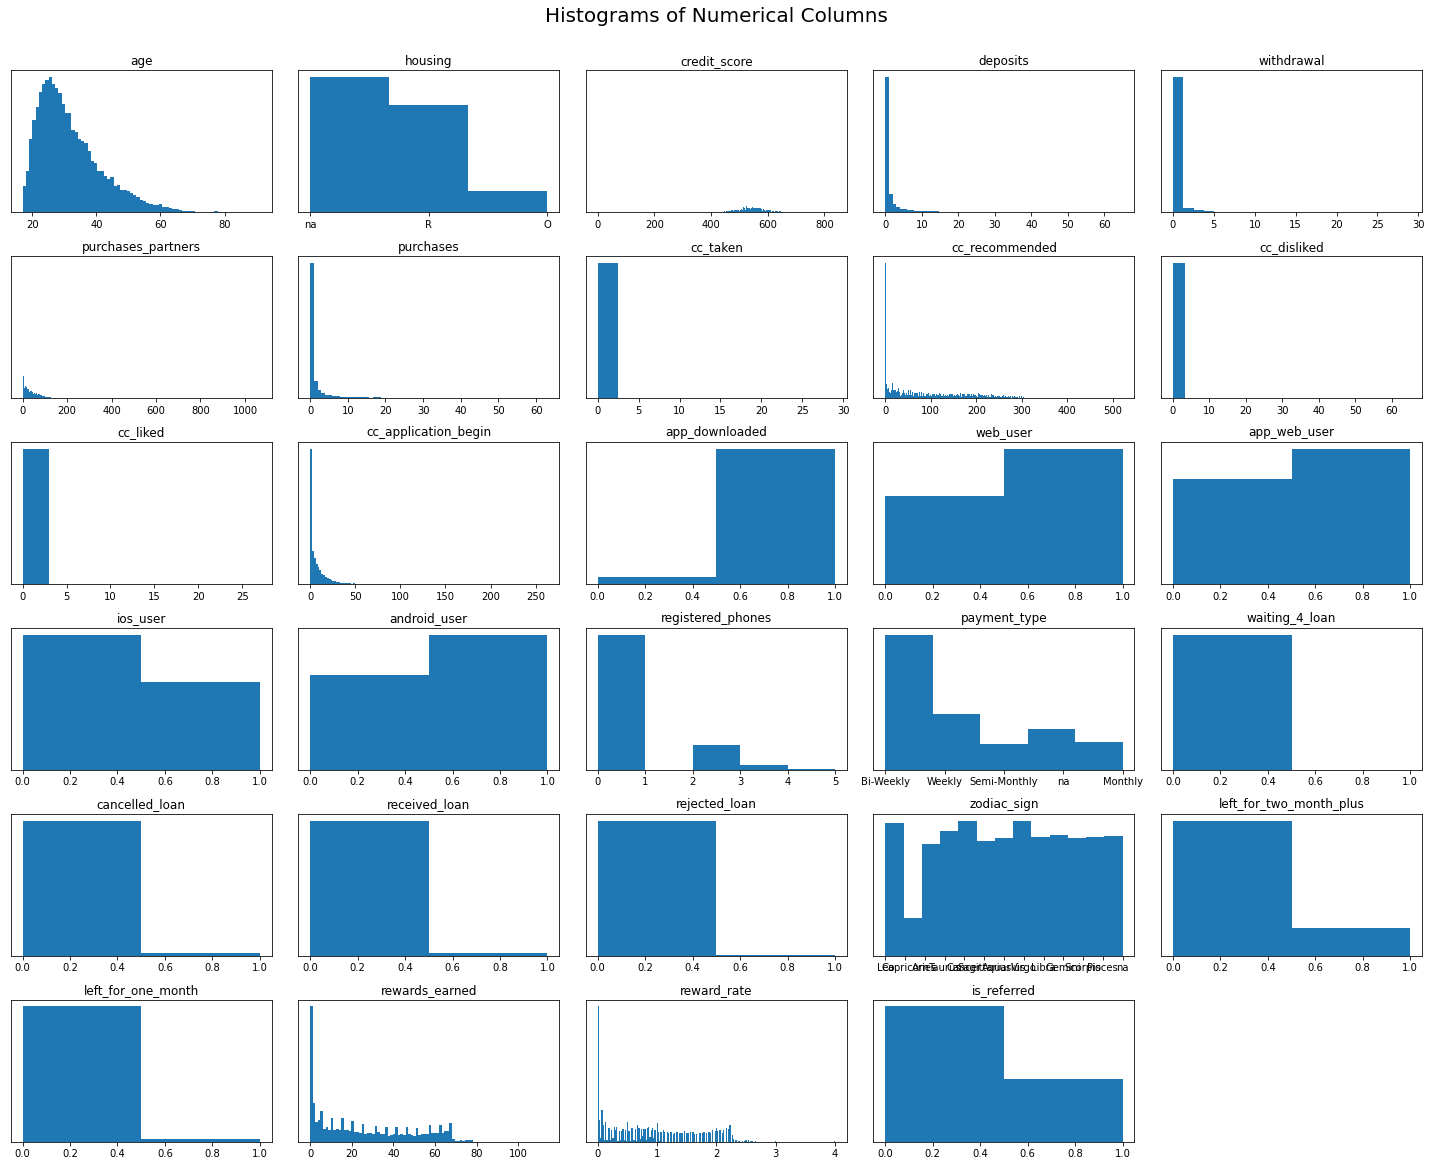

In [16]:
dataset2 = dataset.drop(columns = ['user', 'churn'])
fig = plt.figure(figsize=(20, 17))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Pie Plots

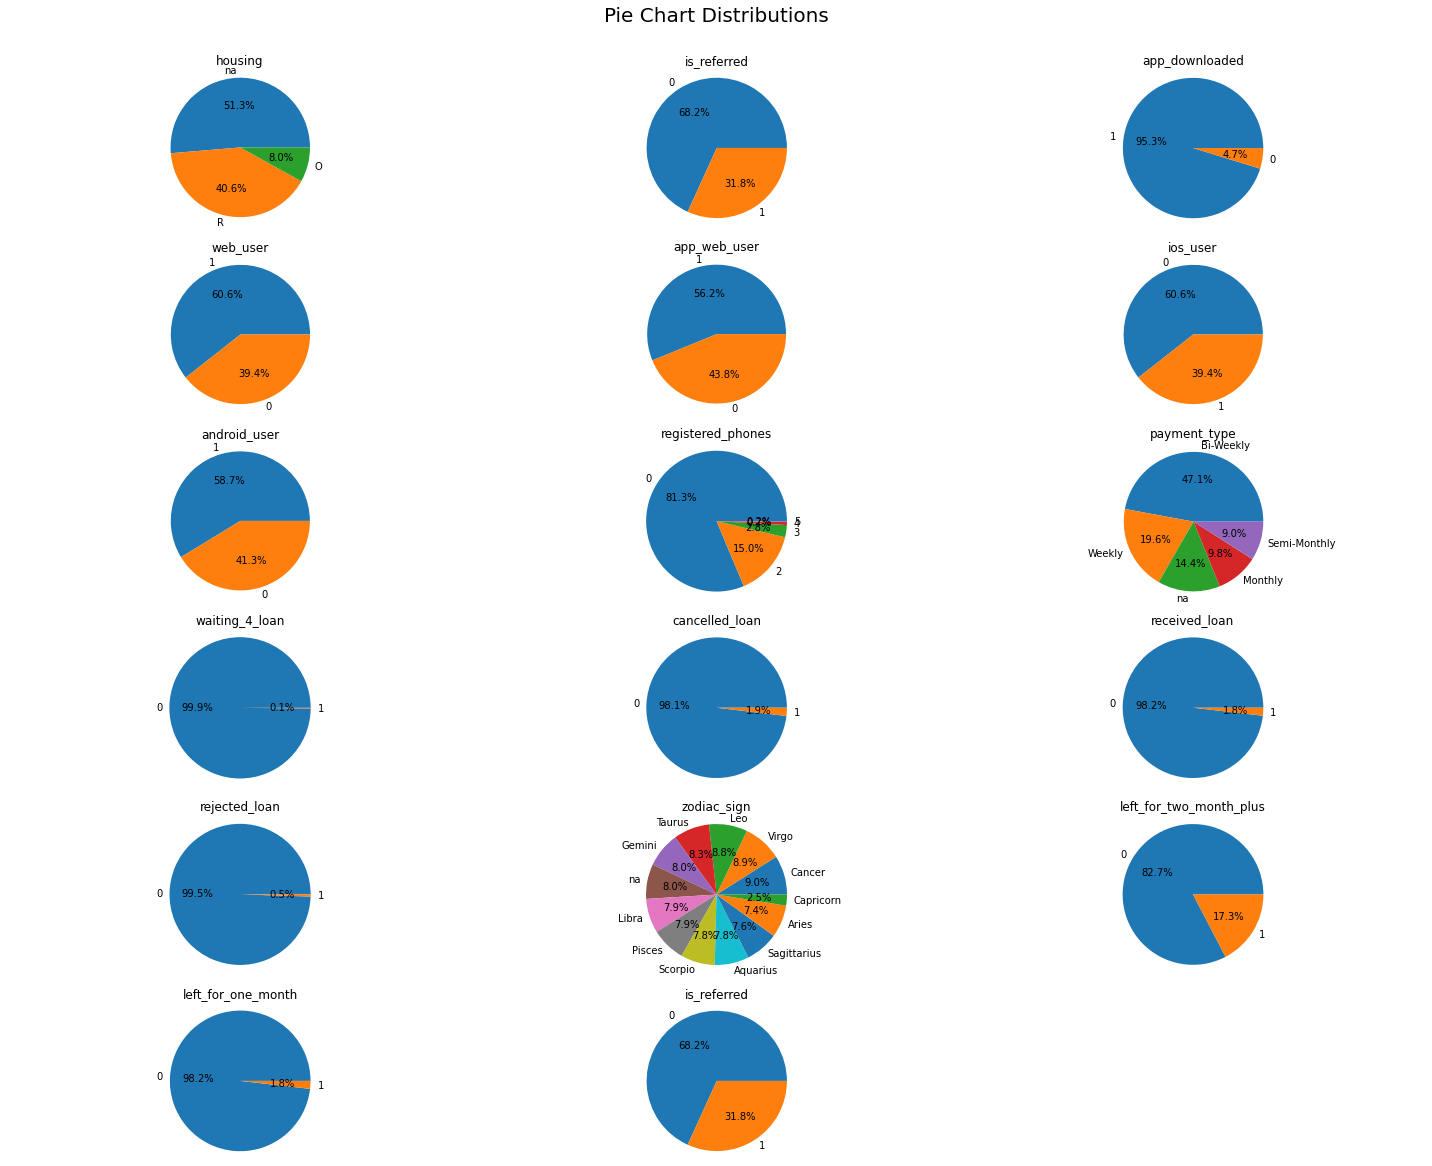

In [17]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(20, 17))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Exploring Uneven Features

In [18]:
print('waiting_4_loan')
print(dataset[dataset2.waiting_4_loan == 1].churn.value_counts())
print('cancelled_loan')
print(dataset[dataset2.cancelled_loan == 1].churn.value_counts())
print('received_loan')
print(dataset[dataset2.received_loan == 1].churn.value_counts())
print('rejected_loan')
print(dataset[dataset2.rejected_loan == 1].churn.value_counts())
print('left_for_one_month')
print(dataset[dataset2.left_for_one_month == 1].churn.value_counts())

waiting_4_loan
0    27
1     8
Name: churn, dtype: int64
cancelled_loan
1    274
0    234
Name: churn, dtype: int64
received_loan
1    292
0    199
Name: churn, dtype: int64
rejected_loan
1    107
0     25
Name: churn, dtype: int64
left_for_one_month
1    266
0    222
Name: churn, dtype: int64


## Correlation with Response Variable

In [19]:
dataset2 = dataset.drop(columns = ['user', 'churn','housing', 'payment_type', 'zodiac_sign'])

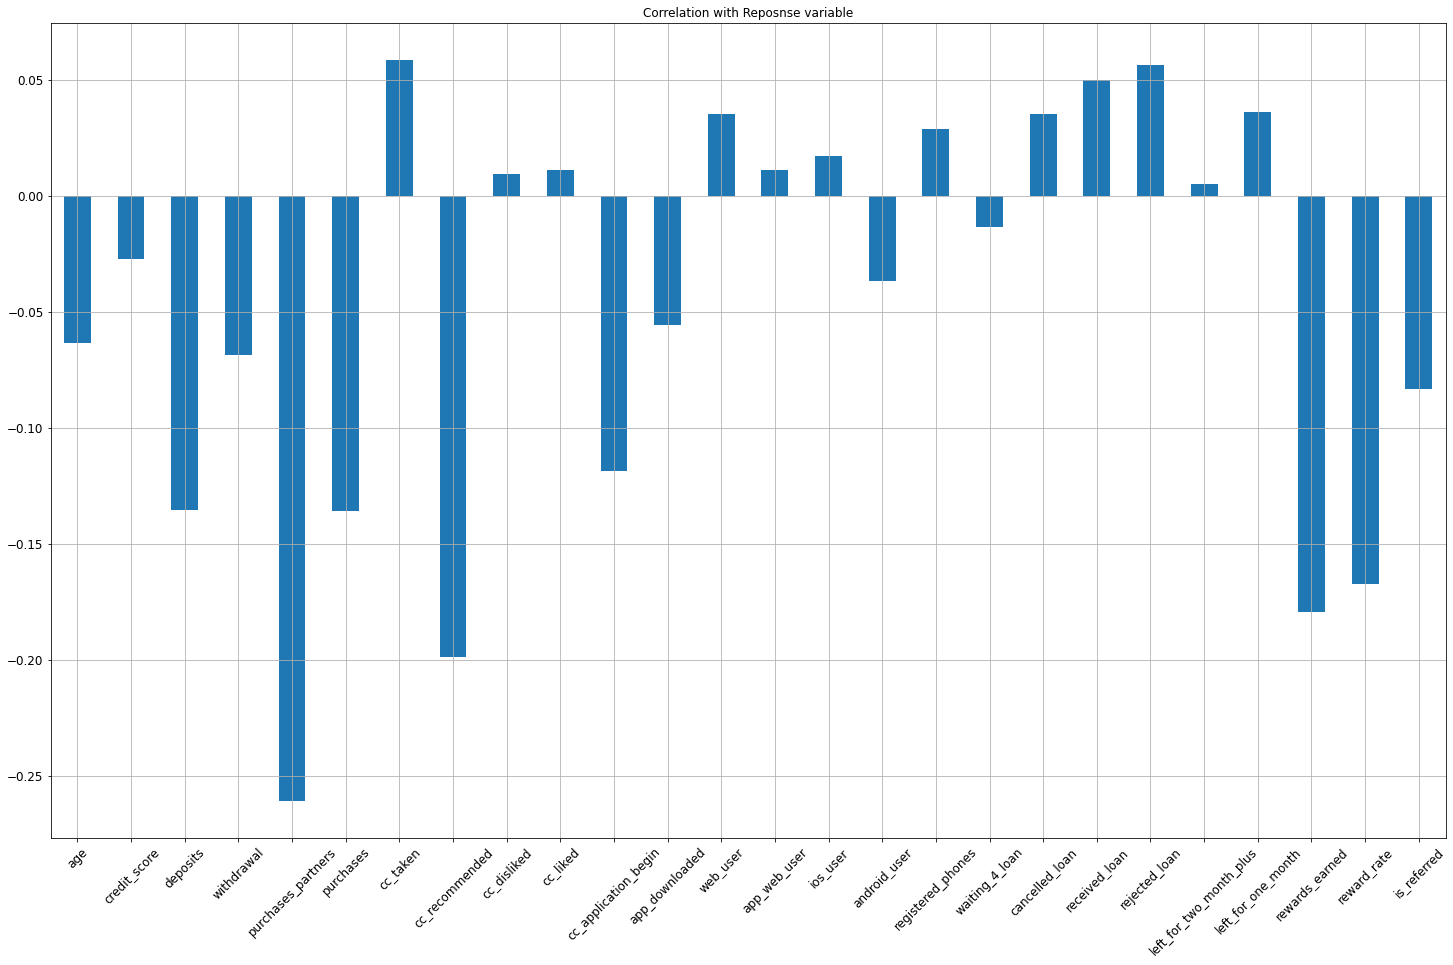

In [20]:
dataset2.corrwith(dataset.churn).plot.bar(figsize=(25,15),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 12, rot = 45,
                  grid = True)

## Correlation Matrix

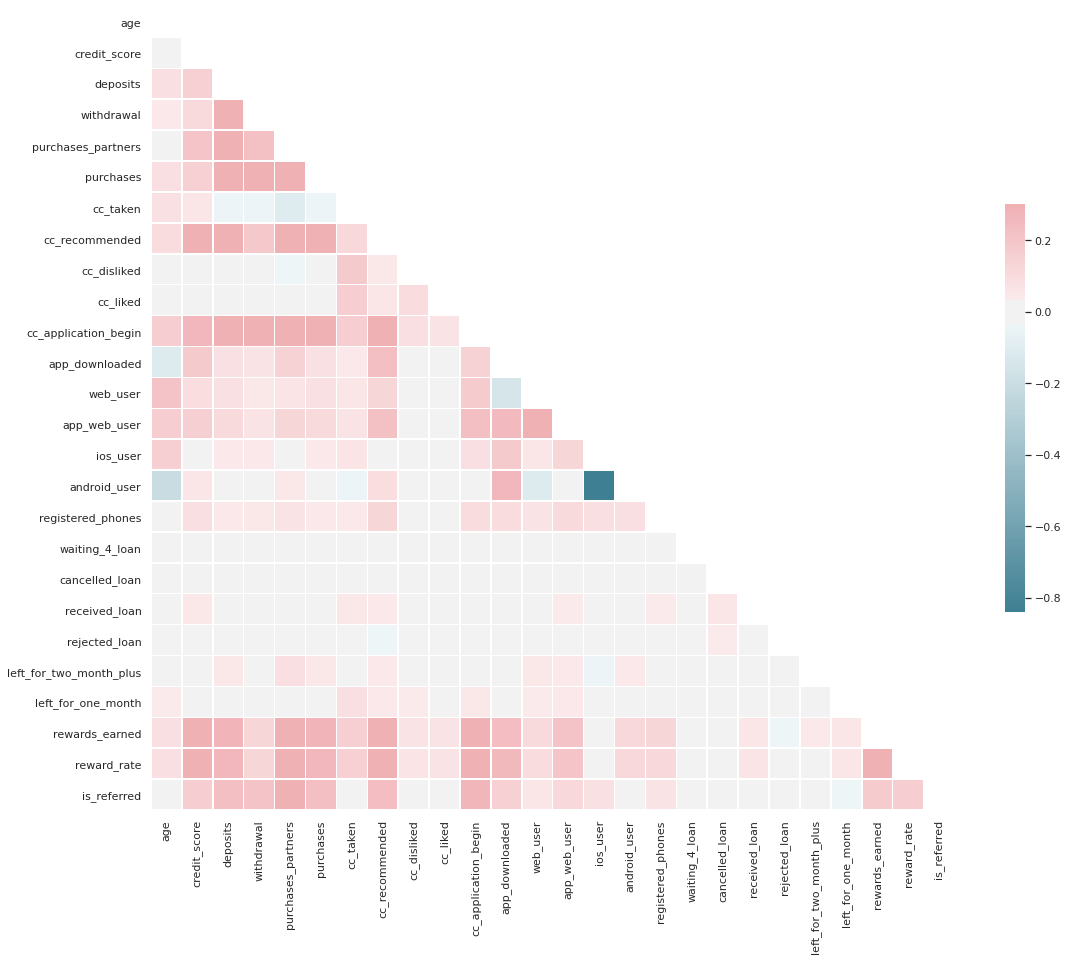

In [21]:
## Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Refining Dataset and storing in new file

In [22]:
# Removing Correlated Fields
dataset = dataset.drop(columns = ['app_web_user'])
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [23]:
## Note: Although there are somewhat correlated fields, they are not colinear
## These feature are not functions of each other, so they won't break the model
## But these feature won't help much either. Feature Selection should remove them.

dataset.to_csv('new_churn_data.csv', index = False)

# Importing New data

In [24]:
df = pd.read_csv('new_churn_data.csv')

In [25]:
df

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,0.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0.0,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,0.0,0,0,2,0,0,0,0,0,0,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26991,24291,1,24.0,R,580.0,0,0,0,0,0,81,0,0,2,1,1,0,1,2,Weekly,0,0,0,0,Leo,0,0,32.0,1.07,1
26992,4116,1,26.0,na,0.0,0,0,2,0,0,1,0,0,0,1,1,0,1,0,Bi-Weekly,0,0,0,1,Cancer,1,0,2.0,0.67,0
26993,23740,0,22.0,na,0.0,0,0,37,0,0,98,0,0,0,1,1,0,1,0,Bi-Weekly,0,0,0,0,Taurus,0,0,28.0,0.93,0
26994,47663,1,46.0,na,529.0,2,0,16,2,0,58,0,0,2,1,1,1,0,0,Semi-Monthly,0,0,0,0,Aries,1,0,27.0,0.90,1


In [26]:
df.isna().any()

user                       False
churn                      False
age                        False
housing                    False
credit_score               False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned             False
reward_rate                False
is_referred                False
dtype: boo

In [27]:
y = df.churn
X = df.drop(columns=['churn'])

In [28]:
X

,user,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,37.0,na,0.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0.0,0.00,0
1,23547,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,27.0,na,0.0,0,0,2,0,0,0,0,0,0,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26991,24291,24.0,R,580.0,0,0,0,0,0,81,0,0,2,1,1,0,1,2,Weekly,0,0,0,0,Leo,0,0,32.0,1.07,1
26992,4116,26.0,na,0.0,0,0,2,0,0,1,0,0,0,1,1,0,1,0,Bi-Weekly,0,0,0,1,Cancer,1,0,2.0,0.67,0
26993,23740,22.0,na,0.0,0,0,37,0,0,98,0,0,0,1,1,0,1,0,Bi-Weekly,0,0,0,0,Taurus,0,0,28.0,0.93,0
26994,47663,46.0,na,529.0,2,0,16,2,0,58,0,0,2,1,1,1,0,0,Semi-Monthly,0,0,0,0,Aries,1,0,27.0,0.90,1


In [29]:
print(y)

0        0
1        0
2        0
3        0
4        1
        ..
26991    1
26992    1
26993    0
26994    1
26995    1
Name: churn, Length: 26996, dtype: int64


# Encoding categorical data

In [30]:
X.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [31]:
X.payment_type.value_counts()

Bi-Weekly       12713
Weekly           5289
na               3899
Monthly          2656
Semi-Monthly     2439
Name: payment_type, dtype: int64

In [32]:
X.zodiac_sign.value_counts()

Cancer         2424
Virgo          2410
Leo            2374
Taurus         2236
Gemini         2168
na             2155
Libra          2128
Pisces         2127
Scorpio        2118
Aquarius       2117
Sagittarius    2056
Aries          2001
Capricorn       682
Name: zodiac_sign, dtype: int64

In [33]:
X = pd.get_dummies(X)

In [34]:
X.columns

Index(['user', 'age', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'registered_phones',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred', 'housing_O', 'housing_R', 'housing_na',
       'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly', 'payment_type_na',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo',
       'zodiac_sign_na'],
      dtype='object')

In [35]:
X

,user,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred,housing_O,housing_R,housing_na,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,payment_type_na,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
0,55409,37.0,0.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0.0,0.00,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,23547,28.0,486.0,0,0,1,0,0,96,0,0,5,1,1,1,0,0,0,0,0,0,0,0,44.0,1.47,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,58313,35.0,561.0,47,2,86,47,0,285,0,0,9,1,0,0,1,2,0,0,0,0,1,0,65.0,2.17,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,8095,26.0,567.0,26,3,38,25,0,74,0,0,26,1,0,0,1,0,0,0,0,0,0,0,33.0,1.10,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,61353,27.0,0.0,0,0,2,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1.0,0.03,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26991,24291,24.0,580.0,0,0,0,0,0,81,0,0,2,1,1,0,1,2,0,0,0,0,0,0,32.0,1.07,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
26992,4116,26.0,0.0,0,0,2,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,2.0,0.67,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
26993,23740,22.0,0.0,0,0,37,0,0,98,0,0,0,1,1,0,1,0,0,0,0,0,0,0,28.0,0.93,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26994,47663,46.0,529.0,2,0,16,2,0,58,0,0,2,1,1,1,0,0,0,0,0,0,1,0,27.0,0.90,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# Splitting the dataset into the Training set and Test set

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [37]:
X_train.shape

(21596, 47)

In [38]:
X_test.shape

(5400, 47)

In [39]:
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [40]:
X_train

,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred,housing_O,housing_R,housing_na,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,payment_type_na,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
8061,21.0,461.0,2,1,11,2,0,39,0,0,3,1,0,0,1,0,0,0,0,0,0,0,5.0,0.17,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
18409,23.0,0.0,0,0,0,0,0,30,0,0,3,1,0,0,1,0,0,0,0,0,0,0,18.0,0.60,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14252,28.0,554.0,21,0,88,21,0,156,0,0,14,1,0,0,1,0,0,0,0,0,0,0,42.0,1.40,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7856,26.0,525.0,0,0,96,0,0,190,0,0,14,1,0,0,1,0,0,0,0,0,0,0,33.0,1.10,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
20554,27.0,0.0,0,0,0,0,0,5,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0.0,0.00,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,43.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.00,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
17289,22.0,562.0,0,0,4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3.0,0.10,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5192,44.0,0.0,0,0,0,0,0,21,0,0,1,1,1,0,1,0,0,0,0,0,0,0,13.0,0.43,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
12172,26.0,469.0,40,0,103,40,0,221,0,0,35,1,1,0,1,0,0,0,0,0,1,0,54.0,1.80,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
X_test

,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred,housing_O,housing_R,housing_na,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,payment_type_na,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
25056,27.0,406.0,0,0,27,0,0,46,0,0,4,1,0,1,0,0,0,0,0,0,0,0,12.0,1.00,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10353,32.0,519.0,0,0,68,0,0,154,0,0,14,1,1,1,0,0,0,0,0,0,0,0,14.0,0.47,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10033,32.0,0.0,0,0,0,0,0,7,0,0,0,1,1,0,1,0,0,0,0,0,0,0,2.0,0.07,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
15291,32.0,601.0,0,0,0,0,0,130,0,0,13,1,1,1,0,0,0,0,0,0,0,0,45.0,1.50,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
25698,25.0,567.0,0,0,29,0,0,70,0,0,4,1,0,1,0,0,0,0,0,0,0,0,19.0,0.63,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,34.0,0.0,0,0,5,0,0,2,0,0,0,1,1,0,1,3,0,0,0,0,0,0,6.0,1.20,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
24936,35.0,0.0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
10601,51.0,533.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.00,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
12437,59.0,619.0,6,0,348,6,0,294,0,0,27,1,1,1,1,2,0,0,0,0,0,0,67.0,2.23,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
print(y_train)

8061     1
18409    0
14252    0
7856     0
20554    1
        ..
10955    0
17289    0
5192     1
12172    1
235      1
Name: churn, Length: 21596, dtype: int64


In [43]:
print(y_test)

25056    0
10353    1
10033    1
15291    1
25698    0
        ..
2364     1
24936    0
10601    1
12437    0
7477     0
Name: churn, Length: 5400, dtype: int64


In [44]:
print(train_identity)

8061     65662
18409    53429
14252     7495
7856      3448
20554    60432
         ...  
10955    69633
17289    64539
5192     13278
12172     2995
235      45233
Name: user, Length: 21596, dtype: int64


In [45]:
print(test_identity)

25056    30824
10353    45135
10033    43925
15291    42687
25698    27539
         ...  
2364     65210
24936    39890
10601    69608
12437    32872
7477     22551
Name: user, Length: 5400, dtype: int64


# Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns.values, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns.values, index = X_test.index)

In [47]:
X_train

,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred,housing_O,housing_R,housing_na,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,payment_type_na,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
8061,-1.123683,0.313560,-0.146865,0.68009,-0.401120,-0.142226,-0.165141,-0.602032,-0.057706,-0.072301,-0.413014,0.222534,-1.244025,-0.806811,0.837662,-0.461138,-0.036669,-0.140147,-0.137198,-0.068888,-0.459140,-0.137548,-0.906957,-0.979434,1.465485,-0.295006,1.209913,-1.028561,-0.948183,-0.329841,-0.314251,2.041202,-0.411858,-0.290157,-0.282489,-0.315317,-0.16226,-0.295562,-0.309873,-0.291655,-0.291561,-0.288371,-0.292029,-0.301450,3.205820,-0.295562
18409,-0.922875,-1.506404,-0.366793,-0.29600,-0.660221,-0.366473,-0.165141,-0.703463,-0.057706,-0.072301,-0.413014,0.222534,-1.244025,-0.806811,0.837662,-0.461138,-0.036669,-0.140147,-0.137198,-0.068888,-0.459140,-0.137548,-0.333659,-0.406880,-0.682368,3.389758,-0.826505,-1.028561,-0.948183,3.031765,-0.314251,-0.489907,-0.411858,-0.290157,3.539962,-0.315317,-0.16226,-0.295562,-0.309873,-0.291655,-0.291561,-0.288371,-0.292029,-0.301450,-0.311933,-0.295562
14252,-0.420855,0.680711,1.942453,-0.29600,1.412585,1.988118,-0.165141,0.716570,-0.057706,-0.072301,0.461037,0.222534,-1.244025,-0.806811,0.837662,-0.461138,-0.036669,-0.140147,-0.137198,-0.068888,-0.459140,-0.137548,0.724738,0.658337,-0.682368,3.389758,-0.826505,-1.028561,1.054649,-0.329841,-0.314251,-0.489907,-0.411858,-0.290157,-0.282489,-0.315317,-0.16226,-0.295562,-0.309873,-0.291655,-0.291561,3.467756,-0.292029,-0.301450,-0.311933,-0.295562
7856,-0.621663,0.566223,-0.366793,-0.29600,1.601022,-0.366473,-0.165141,1.099754,-0.057706,-0.072301,0.461037,0.222534,-1.244025,-0.806811,0.837662,-0.461138,-0.036669,-0.140147,-0.137198,-0.068888,-0.459140,-0.137548,0.327839,0.258881,1.465485,-0.295006,-0.826505,0.972232,-0.948183,-0.329841,3.182173,-0.489907,-0.411858,-0.290157,-0.282489,-0.315317,-0.16226,-0.295562,-0.309873,-0.291655,-0.291561,-0.288371,-0.292029,3.317295,-0.311933,-0.295562
20554,-0.521259,-1.506404,-0.366793,-0.29600,-0.660221,-0.366473,-0.165141,-0.985216,-0.057706,-0.072301,-0.651391,0.222534,0.803842,1.239448,-1.193798,-0.461138,-0.036669,-0.140147,-0.137198,-0.068888,-0.459140,-0.137548,-1.127457,-1.205792,-0.682368,-0.295006,-0.826505,0.972232,-0.948183,-0.329841,-0.314251,2.041202,-0.411858,-0.290157,-0.282489,-0.315317,-0.16226,3.383380,-0.309873,-0.291655,-0.291561,-0.288371,-0.292029,-0.301450,-0.311933,-0.295562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,1.085206,-1.506404,-0.366793,-0.29600,-0.660221,-0.366473,-0.165141,-1.041566,-0.057706,-0.072301,-0.651391,-4.493699,0.803842,-0.806811,-1.193798,-0.461138,-0.036669,-0.140147,-0.137198,-0.068888,-0.459140,-0.137548,-1.127457,-1.205792,-0.682368,3.389758,-0.826505,-1.028561,1.054649,-0.329841,-0.314251,-0.489907,-0.411858,-0.290157,3.539962,-0.315317,-0.16226,-0.295562,-0.309873,-0.291655,-0.291561,-0.288371,-0.292029,-0.301450,-0.311933,-0.295562
17289,-1.023279,0.712294,-0.366793,-0.29600,-0.566002,-0.366473,-0.165141,-1.041566,-0.057706,-0.072301,-0.651391,0.222534,-1.244025,-0.806811,0.837662,-0.461138,-0.036669,-0.140147,-0.137198,-0.068888,-0.459140,-0.137548,-0.995157,-1.072640,-0.682368,-0.295006,-0.826505,0.972232,-0.948183,-0.329841,-0.314251,-0.489907,2.428019,-0.290157,-0.282489,-0.3153

In [48]:
X_test

,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred,housing_O,housing_R,housing_na,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,payment_type_na,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
25056,-0.521259,0.096427,-0.366793,-0.296,-0.024246,-0.366473,-0.165141,-0.523141,-0.057706,-0.072301,-0.333555,0.222534,-1.244025,1.239448,-1.193798,-0.461138,-0.036669,-0.140147,-0.137198,-0.068888,-0.45914,-0.137548,-0.598258,0.125729,-0.682368,-0.295006,-0.826505,0.972232,-0.948183,-0.329841,-0.314251,2.041202,-0.411858,-0.290157,-0.282489,-0.315317,-0.16226,-0.295562,-0.309873,-0.291655,-0.291561,-0.288371,-0.292029,-0.301450,3.205820,-0.295562
10353,-0.019238,0.542536,-0.366793,-0.296,0.941493,-0.366473,-0.165141,0.694030,-0.057706,-0.072301,0.461037,0.222534,0.803842,1.239448,-1.193798,-0.461138,-0.036669,-0.140147,-0.137198,-0.068888,-0.45914,-0.137548,-0.510058,-0.579977,1.465485,-0.295006,-0.826505,0.972232,-0.948183,-0.329841,-0.314251,2.041202,-0.411858,-0.290157,-0.282489,-0.315317,-0.16226,-0.295562,-0.309873,-0.291655,-0.291561,-0.288371,-0.292029,-0.301450,3.205820,-0.295562
10033,-0.019238,-1.506404,-0.366793,-0.296,-0.660221,-0.366473,-0.165141,-0.962675,-0.057706,-0.072301,-0.651391,0.222534,0.803842,-0.806811,0.837662,-0.461138,-0.036669,-0.140147,-0.137198,-0.068888,-0.45914,-0.137548,-1.039257,-1.112586,-0.682368,-0.295006,-0.826505,0.972232,1.054649,-0.329841,-0.314251,-0.489907,-0.411858,-0.290157,-0.282489,-0.315317,-0.16226,-0.295562,3.227131,-0.291655,-0.291561,-0.288371,-0.292029,-0.301450,-0.311933,-0.295562
15291,-0.019238,0.866260,-0.366793,-0.296,-0.660221,-0.366473,-0.165141,0.423547,-0.057706,-0.072301,0.381577,0.222534,0.803842,1.239448,-1.193798,-0.461138,-0.036669,-0.140147,-0.137198,-0.068888,-0.45914,-0.137548,0.857038,0.791489,-0.682368,-0.295006,1.209913,-1.028561,-0.948183,-0.329841,-0.314251,2.041202,-0.411858,-0.290157,-0.282489,-0.315317,-0.16226,-0.295562,-0.309873,3.428710,-0.291561,-0.288371,-0.292029,-0.301450,-0.311933,-0.295562
25698,-0.722067,0.732033,-0.366793,-0.296,0.022863,-0.366473,-0.165141,-0.252659,-0.057706,-0.072301,-0.333555,0.222534,-1.244025,1.239448,-1.193798,-0.461138,-0.036669,-0.140147,-0.137198,-0.068888,-0.45914,-0.137548,-0.289559,-0.366934,-0.682368,-0.295006,-0.826505,0.972232,1.054649,-0.329841,-0.314251,-0.489907,-0.411858,-0.290157,-0.282489,-0.315317,-0.16226,-0.295562,-0.309873,-0.291655,-0.291561,-0.288371,3.424323,-0.301450,-0.311933,-0.295562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,0.181570,-1.506404,-0.366793,-0.296,-0.542448,-0.366473,-0.165141,-1.019026,-0.057706,-0.072301,-0.651391,0.222534,0.803842,-0.806811,0.837662,2.812965,-0.036669,-0.140147,-0.137198,-0.068888,-0.45914,-0.137548,-0.862857,0.392033,-0.682368,-0.295006,-0.826505,0.972232,1.054649,-0.329841,-0.314251,-0.489907,-0.411858,-0.290157,-0.282489,-0.315317,-0.16226,-0.295562,-0.309873,3.428710,-0.291561,-0.288371,-0.292029,-0.301450,-0.311933,-0.295562
24936,0.281974,-1.506404,-0.366793,-0.296,-0.660221,-0.366473,-0.165141,-1.041566,-0.057706,-0.072301,-0.651391,0.222534,0.803842,-0.806811,0.837662,-0.461138,-0.036669,-0.140147,-0.137198,-0.068888,-0.45914,-0.137548,-1.127457,-1.205792,-0.682368,-0.295006,-0.826505,0.972232,-0.948183,-0.329841,-0.314251,-0.489907,2.428019,-0.290157,-0.282489,-0.315317,6.16295,-0.295562,-0

# Model Building

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [54]:
models = []
models.append(('DTC', DecisionTreeClassifier(criterion= 'entropy', random_state=0)))
models.append(('KNC', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)))
models.append(('LAR', LogisticRegression(random_state = 0)))
models.append(('SVC', SVC(random_state = 0, kernel = 'rbf')))
models.append(('XGB', XGBClassifier()))

In [55]:
results = []
names = []
kFold = []

for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracies = accuracy_score(y_test, y_pred)
  fold = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
  results.append(accuracies*100)
  names.append(name)
  kFold.append(fold.mean()*100)
final_comparison = pd.DataFrame(list(zip(names, results, kFold)), columns = ['Model Name', 'Accuracy', 'K-Fold'])

In [56]:
final_comparison.sort_values(by=['Accuracy'], ascending=False)

,Model Name,Accuracy,K-Fold
3,RFC,73.814815,72.624618
6,XGB,71.462963,70.638175
5,SVC,68.074074,67.401474
0,DTC,67.740741,66.910485
4,LAR,65.574074,64.771210
1,KNC,60.592593,60.191800
2,NB,59.166667,59.432250
